# Plataforma de trabajo: Google Colaboratory

# Datalake: Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
yeld_business_florida = pd.read_csv('/content/drive/MyDrive/Otros/yelp_business_florida_final.csv')

<ipython-input-4-5dbbfaac0aac>:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  yeld_business_florida = pd.read_csv('/content/drive/MyDrive/Otros/yelp_business_florida_final.csv')


In [ ]:
pd.options.display.max_columns = None
yeld_business_florida.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,RestaurantsPriceRange2,BusinessAcceptsCreditCards,Ambience,RestaurantsDelivery,casual_False,casual_None,casual_True,classy_False,classy_None,classy_True,divey_False,divey_None,divey_True,hipster_False,hipster_None,hipster_True,intimate_False,intimate_None,intimate_True,romantic_False,romantic_None,romantic_True,touristy_False,touristy_None,touristy_True,trendy_False,trendy_None,trendy_True,upscale_False,upscale_None,upscale_True,Active Life,American (New),American (Traditional),Auto Repair,Automotive,Bars,Beauty & Spas,Breakfast & Brunch,Burgers,Coffee & Tea,Event Planning & Services,Fast Food,Food,Hair Salons,Health & Medical,Home & Garden,Home Services,Hotels & Travel,Local Services,Nightlife,Pizza,Restaurants,Sandwiches,Shopping,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707.0,27.766590,-82.732983,3.5,5,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,9:0-17:0,NaN,NaN
1,jaxMSoInw8Poo3XeMJt8lQ,Adams Dental,15 N Missouri Ave,Clearwater,FL,33755.0,27.966235,-82.787412,5.0,10,1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7:30-15:30,7:30-15:30,7:30-15:30,7:30-15:30,NaN,NaN,NaN
2,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771.0,27.916116,-82.760461,4.5,100,0,1,True,"touristy_False, hipster_False, romantic_False,...",True,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10:0-18:0,10:0-20:0,10:0-20:0,10:0-20:0,10:0-20:0,10:0-20:0,NaN


In [ ]:
yeld_business_florida.shape

(17973, 73)

# 1. Vistazo a las columnas o variables que tenemos en la tabla

In [ ]:
yeld_business_florida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17973 entries, 0 to 17972
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   business_id                 17973 non-null  object 
 1   name                        17973 non-null  object 
 2   address                     17415 non-null  object 
 3   city                        17973 non-null  object 
 4   state                       17973 non-null  object 
 5   postal_code                 17973 non-null  float64
 6   latitude                    17973 non-null  float64
 7   longitude                   17973 non-null  float64
 8   stars                       17973 non-null  float64
 9   review_count                17973 non-null  int64  
 10  is_open                     17973 non-null  int64  
 11  RestaurantsPriceRange2      9541 non-null   object 
 12  BusinessAcceptsCreditCards  14678 non-null  object 
 13  Ambience                    510

# 2. Top 12 Categorias en Yelp

In [15]:
import pandas as pd

florida_cities_postal_code = pd.read_csv('/content/drive/MyDrive/Otros/borrador_florida_cities_postal_code.csv')

# Dividir las categorías en subcategorías y contarlas
subcategories = florida_cities_postal_code['categories'].str.split(', ').explode()

# INcluded categories
categories = [
    'Active Life', 'Arts & Entertainment', 'Automotive', 'Beauty & Spas',
    'Education', 'Event Planning & Services', 'Financial Services', 'Food',
    'Health & Medical', 'Home Services', 'Hotels & Travel', 'Local Flavor',
    'Local Services', 'Mass Media', 'Nightlife', 'Pets', 'Professional Services',
    'Public Services & Government', 'Real Estate', 'Religious Organizations',
    'Restaurants', 'Shopping'
]
#Fuente: https://blog.yelp.com/businesses/yelp_category_list/


# Filtering categories from excluded list and calculating counts
category_counts = subcategories[subcategories.isin(categories)].value_counts() / len(florida_cities_postal_code)

# Getting the top 12 category names
top_category_names = category_counts.head(12).index.tolist()

#print(top_category_names)

# Mostrar el conteo de categorías incluidas

category_counts.head(12)

Restaurants                  0.336282
Food                         0.184610
Shopping                     0.151950
Home Services                0.109442
Beauty & Spas                0.097646
Nightlife                    0.086129
Health & Medical             0.084849
Automotive                   0.075335
Local Services               0.075001
Active Life                  0.062594
Event Planning & Services    0.061704
Hotels & Travel              0.043621
Name: categories, dtype: float64

# 3. Top 12 Subcategorias en Yelp

In [16]:
subcategories = florida_cities_postal_code['categories'].str.split(', ').explode()

excluded_categories = [
    'Active Life', 'Arts & Entertainment', 'Automotive', 'Beauty & Spas',
    'Education', 'Event Planning & Services', 'Financial Services', 'Food',
    'Health & Medical', 'Home Services', 'Hotels & Travel', 'Local Flavor',
    'Local Services', 'Mass Media', 'Nightlife', 'Pets', 'Professional Services',
    'Public Services & Government', 'Real Estate', 'Religious Organizations',
    'Restaurants', 'Shopping'
]

filtered_subcategory_counts = subcategories[~subcategories.isin(excluded_categories)].value_counts() / len(florida_cities_postal_code)

top_subcategory_names = filtered_subcategory_counts.head(12).index.tolist()

filtered_subcategory_counts.head(12)

Bars                      0.079119
American (Traditional)    0.055917
Sandwiches                0.055806
Coffee & Tea              0.042619
Breakfast & Brunch        0.041896
Fast Food                 0.039392
American (New)            0.038780
Pizza                     0.037779
Home & Garden             0.036054
Auto Repair               0.034051
Burgers                   0.033439
Hair Salons               0.032493
Name: categories, dtype: float64

# 4. Descripcion estadistica de las variables numericas

In [ ]:
yeld_business_florida[['stars','review_count']].describe()

,stars,review_count
count,17973.000000,17973.000000
mean,3.619846,44.126134
std,0.987679,105.440298
min,1.000000,5.000000
25%,3.000000,8.000000
50%,4.000000,15.000000
75%,4.500000,37.000000
max,5.000000,3260.000000


# 5. Stars vs Review: La mayoria de reviews son de 4 y 4.5 strellas en Yelp platform.

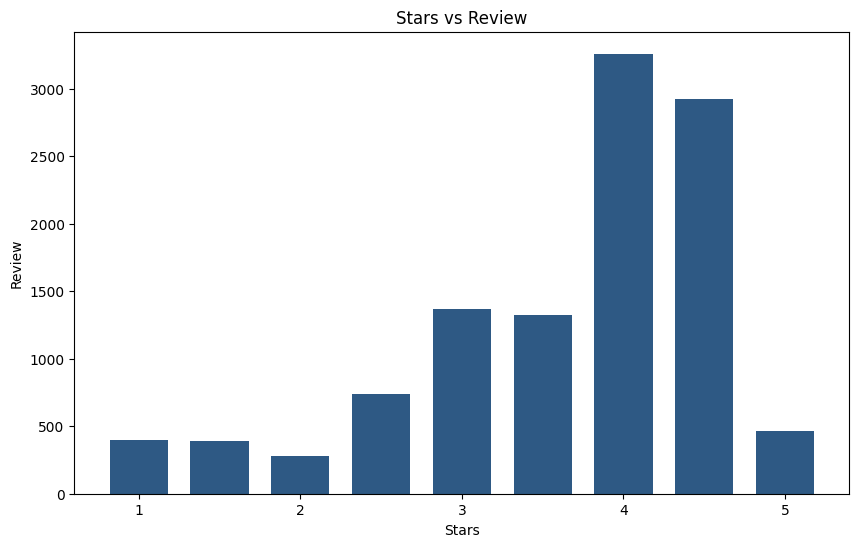

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(yeld_business_florida['stars'], yeld_business_florida['review_count'], width=0.36, color='#2E5984')
#sns.violinplot(x=yeld_business_florida['stars'], y=yeld_business_florida['review_count'], inner="quartile", palette="pastel")
plt.title('Stars vs Review')
plt.xlabel('Stars')
plt.ylabel('Review')
#plt.grid(True)
plt.show()

In [ ]:
yeld_business_florida['RestaurantsPriceRange2'] = pd.to_numeric(yeld_business_florida['RestaurantsPriceRange2'], errors='coerce').astype('Int64')

# 6. Los restaurants en Florida de la muestra tienen un Restaurant Price Range de “$ $”, lo que significa que los restaurants tienen un costo de 11 a 30 dolares por persona. De otro lado, hay una gran demanda por los restaurants de este tipo.

In [ ]:
columns_to_count = ['RestaurantsPriceRange2'] #, 'BusinessAcceptsCreditCards', 'Ambience', 'RestaurantsDelivery']

for column in columns_to_count:
    counts = yeld_business_florida[column].value_counts()
    print(f"Counts for column '{column}':")
    print(counts)

# In particular, “$” means under $10; “$ $” means “$11-$30”; “$ $ $” means “$31-$60”; and “$ $ $ $” means “above $61”.

Counts for column 'RestaurantsPriceRange2':
2    5406
1    3448
3     560
4     125
Name: RestaurantsPriceRange2, dtype: Int64


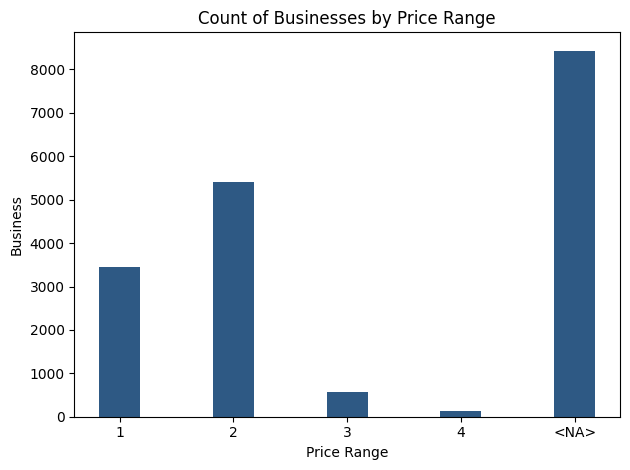

In [ ]:
yeld_business_florida['RestaurantsPriceRange2'] = yeld_business_florida['RestaurantsPriceRange2'].astype(str)

price_range_counts = yeld_business_florida['business_id'].groupby(yeld_business_florida['RestaurantsPriceRange2']).count()

plt.bar(price_range_counts.index, price_range_counts.values, width=0.36, color='#2E5984')
plt.xlabel('Price Range')
plt.ylabel('Business')
plt.title('Count of Businesses by Price Range')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()

# 7. Tenemos presencia de outliers en reviews.

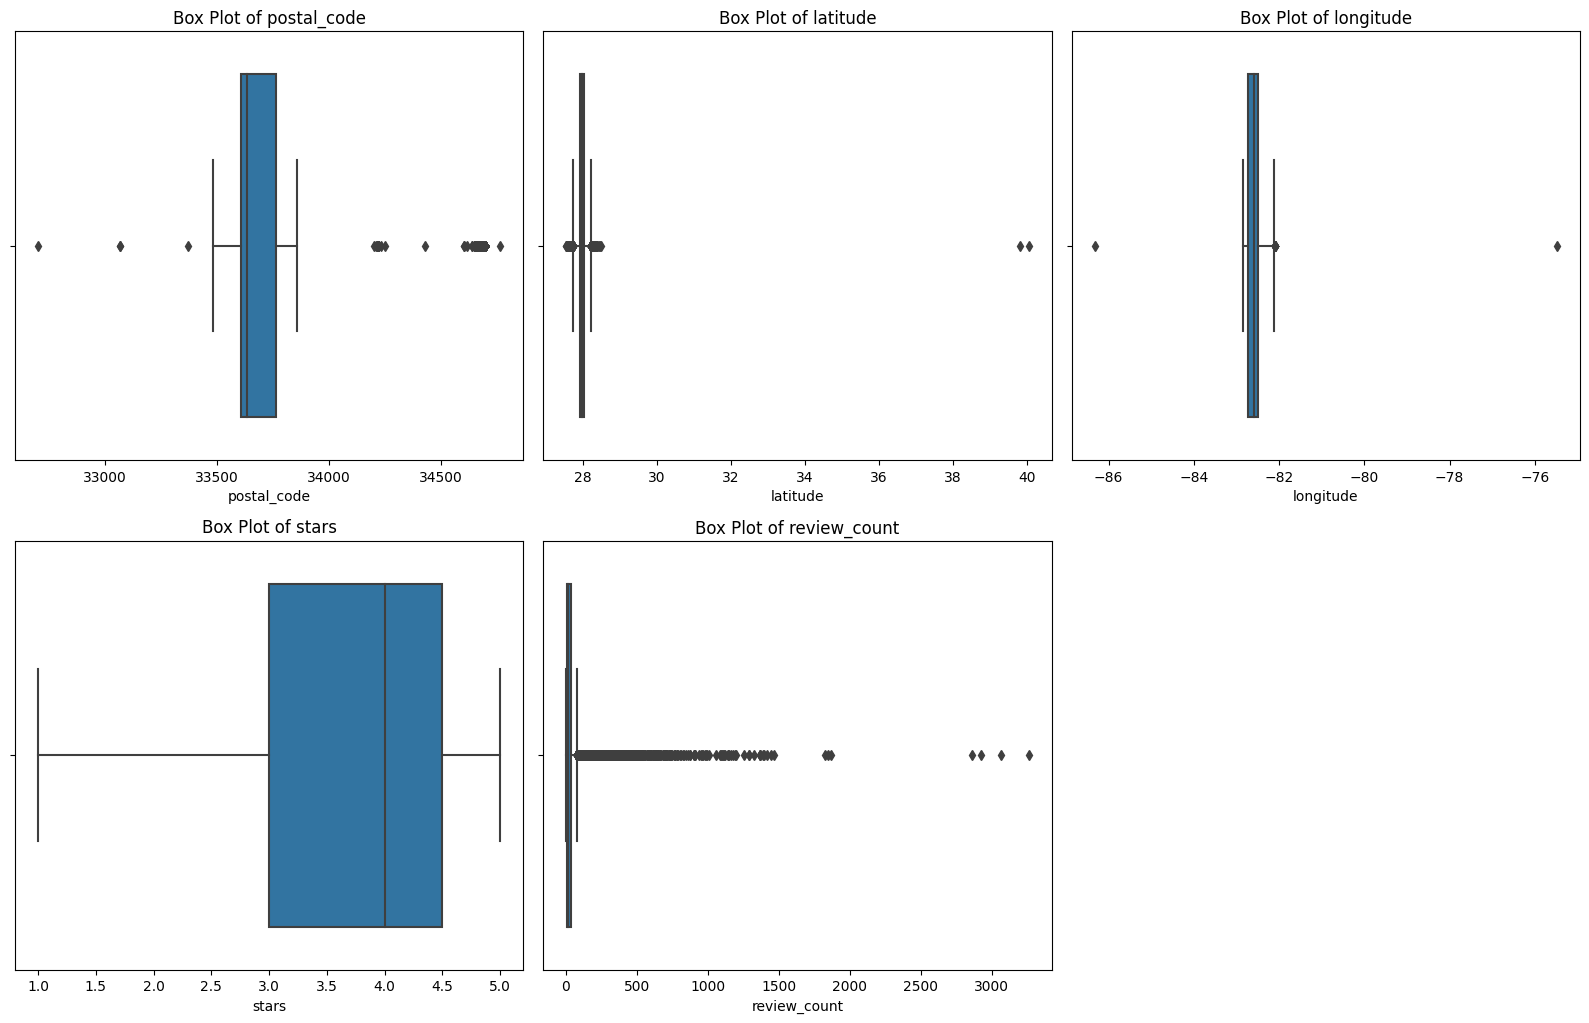

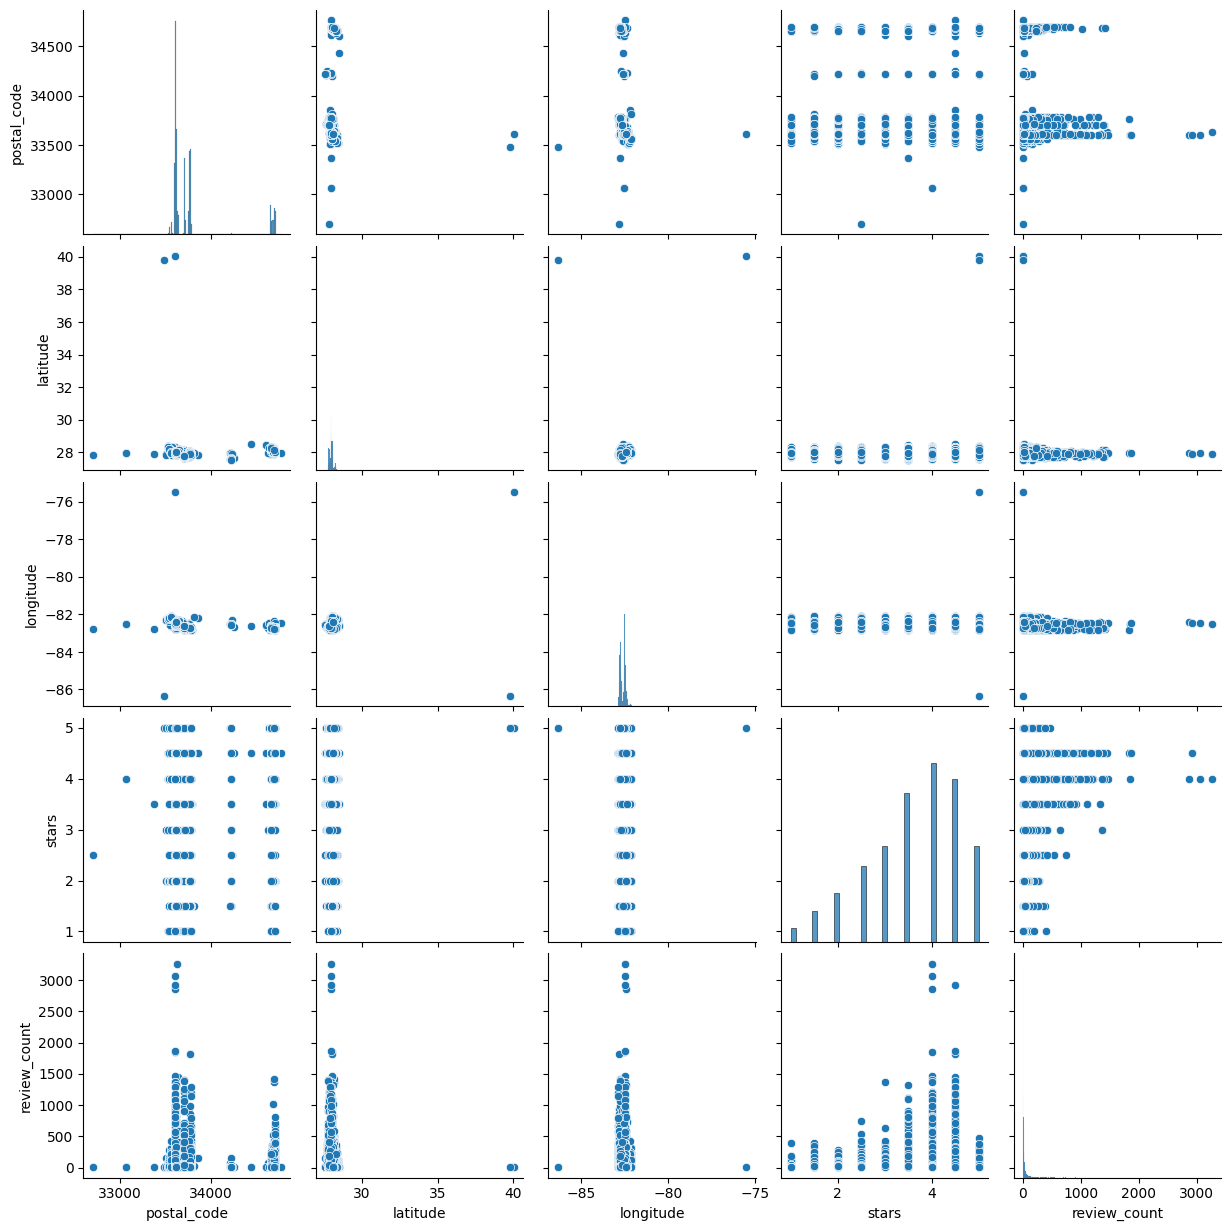

In [ ]:
numerical_columns = ['postal_code', 'latitude', 'longitude', 'stars', 'review_count']

# Create subplots for each numerical column
fig = plt.figure(figsize=(16, 15))
for i, column in enumerate(numerical_columns):
    ax = fig.add_subplot(3, 3, i+1)
    sns.boxplot(x=yeld_business_florida[column], ax=ax)
    ax.set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

# Create scatter plots for pairwise combinations of numerical columns
sns.pairplot(yeld_business_florida[numerical_columns])
plt.show()

# 8. De la nube de palabras destacan Fast food, American Traditional, Service, Medical, Spas, Health y Home. Esto nos da una idea las categorias mas importantes.

Pet Services, Pet Groomers, Pets, Veterinarians
<class 'str'>


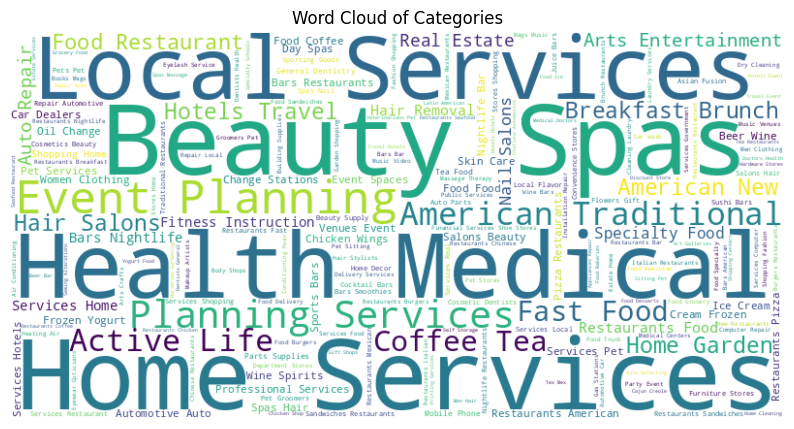

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

file_path = '/content/drive/MyDrive/yelp/Copia de business.pkl'

df_yelp_nested = pd.read_pickle(file_path)

df_no_duplicate_cols = df_yelp_nested.loc[:, ~df_yelp_nested.columns.duplicated()].copy()

print(df_no_duplicate_cols.iloc[25]['categories'])
print(type(df_no_duplicate_cols.iloc[25]['categories']))

df_no_duplicate_cols['categories'] = df_no_duplicate_cols['categories'].str.title()  # Apply .str.title() to the 'categories' Series
text = ' '.join(df_no_duplicate_cols['categories'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()


In [ ]:
'''
yeld_business_florida_cleaned = yeld_business_florida[yeld_business_florida['RestaurantsPriceRange2'] != '<NA>']

yeld_business_florida_cleaned['RestaurantsPriceRange2'] = yeld_business_florida_cleaned['RestaurantsPriceRange2'].astype(str)

price_range_counts = yeld_business_florida_cleaned['business_id'].groupby(yeld_business_florida_cleaned['RestaurantsPriceRange2']).count()

plt.bar(price_range_counts.index, price_range_counts.values, width=0.36, color='#2E5984')
plt.xlabel('Price Range')
plt.ylabel('Business')
plt.title('Count of Businesses by Price Range')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()
'''

"\nyeld_business_florida_cleaned = yeld_business_florida[yeld_business_florida['RestaurantsPriceRange2'] != '<NA>']\n\nyeld_business_florida_cleaned['RestaurantsPriceRange2'] = yeld_business_florida_cleaned['RestaurantsPriceRange2'].astype(str)\n\nprice_range_counts = yeld_business_florida_cleaned['business_id'].groupby(yeld_business_florida_cleaned['RestaurantsPriceRange2']).count()\n\nplt.bar(price_range_counts.index, price_range_counts.values, width=0.36, color='#2E5984')\nplt.xlabel('Price Range')\nplt.ylabel('Business')\nplt.title('Count of Businesses by Price Range')\nplt.xticks(rotation=45)  # Rotate x-axis labels for better visibility\nplt.tight_layout()\n\nplt.show()\n"